In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:

df = pd.read_csv('imdb_movies.csv')
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [4]:
df.shape

(100, 62)

In [5]:
df.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country'],
      dtype='object')

In [6]:
df.isnull().sum()

Title             0
title_year        0
budget            0
Gross             0
actor_1_name      0
                 ..
Votes1000         0
VotesUS           0
VotesnUS          0
content_rating    0
Country           0
Length: 62, dtype: int64

In [7]:
d1 = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,60,61]]
d1.shape
print(d1.columns)

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime',
       'content_rating', 'Country'],
      dtype='object')


In [8]:
d1.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,R,USA


###  BAR CHART
<b>STNTEX : plt.bar(x,y,color,label,edgecolor)</b>

####  Q. Plot year wise Runtime budget of top 7 movies on a bar chart

In [9]:
q1 = d1.groupby('title_year')['Runtime'].mean().reset_index()
q1 = q1.sort_values(by = 'title_year',ascending = True).head(7)


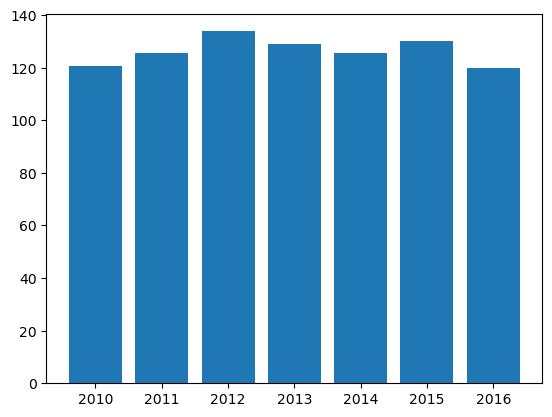

In [10]:
plt.bar(q1['title_year'],q1['Runtime'])
plt.show()

####  ADD TITLE, XLABEL, YLABEL, PLT.SHOW

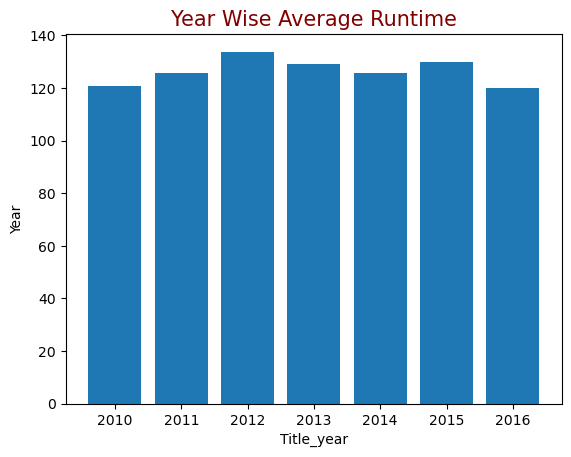

In [11]:
plt.bar(q1['title_year'],q1['Runtime'])
plt.title("Year Wise Average Runtime", fontsize = 15 , color = 'maroon')
plt.xlabel('Title_year')
plt.ylabel('Year')
plt.show()

#### ADD color and edge color to the bars

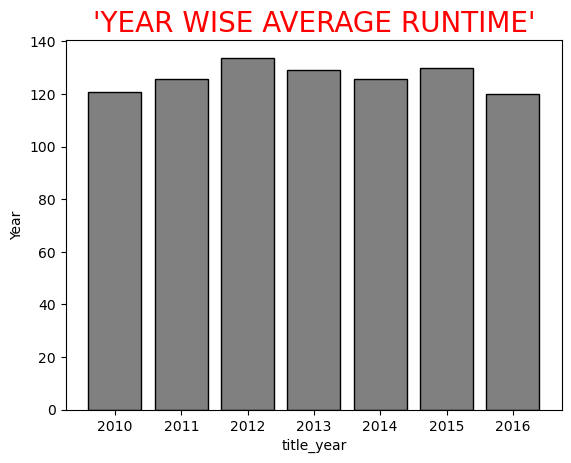

In [12]:
plt.bar(q1['title_year'],q1['Runtime'], edgecolor = 'black', color ='grey')
plt.xlabel('title_year')
plt.ylabel('Year')
plt.title ("'YEAR WISE AVERAGE RUNTIME'", fontsize = 20, color = 'red')
plt.show()

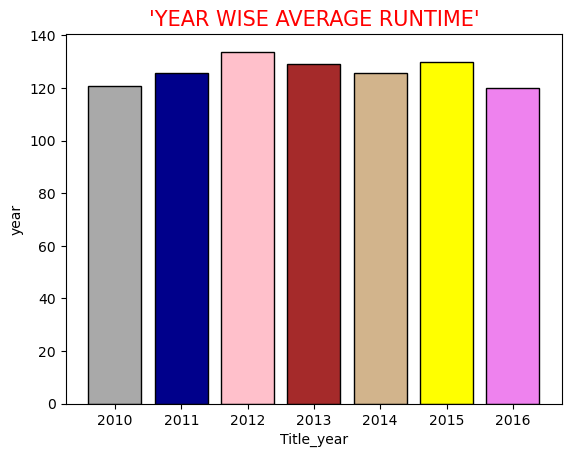

In [13]:
plt.bar(q1['title_year'],q1['Runtime'], edgecolor = 'black', color =['darkgrey','darkblue','pink','brown','tan','yellow','violet'])
plt.title("'YEAR WISE AVERAGE RUNTIME'", fontsize = 15, color = 'red')
plt.xlabel('Title_year')
plt.ylabel('year')
plt.show()

## 2) Plot genre_1 wise mean of budget and gross on bar chart


In [14]:
df['budget'] = df['budget']/1000000

df['Gross'] = df['Gross']/1000000
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [15]:
df.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country'],
      dtype='object')

In [16]:
q2 = df.groupby('genre_1')[['budget','Gross']].mean()
q2.index.names = ['Genre']
q2.head()


,budget,Gross
Genre,,
Action,130.351852,240.033516
Adventure,103.500000,153.594821
Animation,148.654545,239.126987
Biography,30.307692,82.074664
Comedy,15.555556,53.249416


#### ADD Label and Lagend

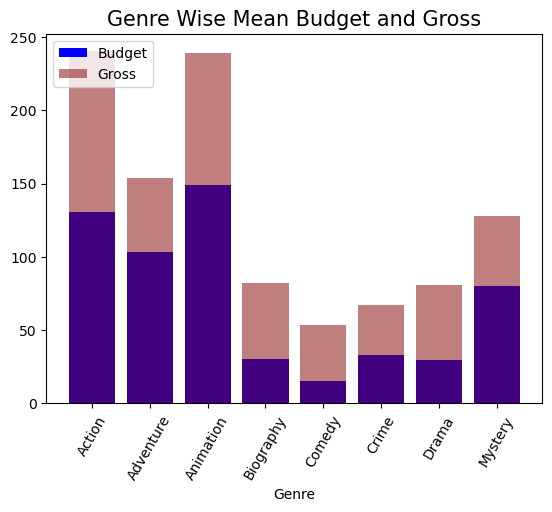

In [17]:
plt.bar(q2.index,q2['budget'],label = 'Budget', color = 'blue')
plt.bar(q2.index,q2['Gross'],label = 'Gross', color = 'maroon', alpha = 0.5)
plt.xlabel('Genre')
plt.title('Genre Wise Mean Budget and Gross', fontsize = 15)
plt.legend(loc = 2)
plt.xticks(rotation = 60)
plt.show()

### Changing the axis ticks and axis scale in above graph 

In [18]:
print(q2.index)
print(len(q2.index))

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Mystery'],
      dtype='object', name='Genre')
8


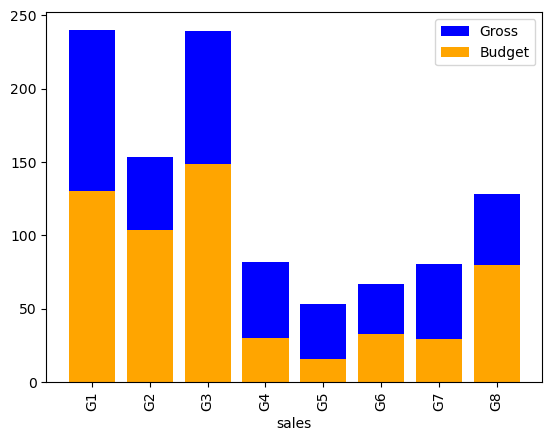

In [19]:
plt.bar(q2.index, q2['Gross'],label = 'Gross', color = 'blue' )
plt.bar(q2.index,q2['budget'],label = 'Budget', color = 'orange')
plt.xlabel('sales')
plt.xticks(rotation = 90)
plt.xticks(q2.index,['G1','G2','G3','G4','G5','G6','G7','G8'])
plt.legend()
plt.show()

#### 3) Plot actor_1 name based and their  mean of fb_likes for the top 7 actors with highest fb_likes on a bar chart 


In [33]:
d1.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,93.0,128,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,69.0,118,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,81.0,116,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,96.0,137,R,USA


In [34]:
q3 = df.groupby('actor_1_name')['actor_1_facebook_likes'].mean().reset_index()

q3 = q3.sort_values(by='actor_1_facebook_likes', ascending = False ).head(7)
q3.columns = ['Actor','Fb_likes']
q3

,Actor,Fb_likes
3,Amy Adams,35000.000000
43,Jennifer Lawrence,34000.000000
23,Dev Patel,33000.000000
49,Leonardo DiCaprio,29000.000000
73,Tom Hardy,27000.000000
63,Ryan Gosling,26666.666667
17,Chris Hemsworth,26000.000000


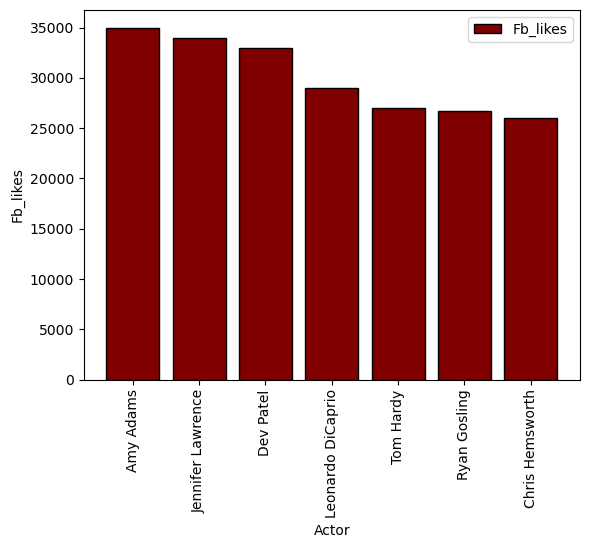

In [45]:
plt.bar(q3['Actor'],q3['Fb_likes'], color = 'maroon', edgecolor = 'black', label = 'Fb_likes')
plt.xlabel('Actor')
plt.ylabel('Fb_likes')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


###  Adding the Xlim, Ylim, figure, savefig

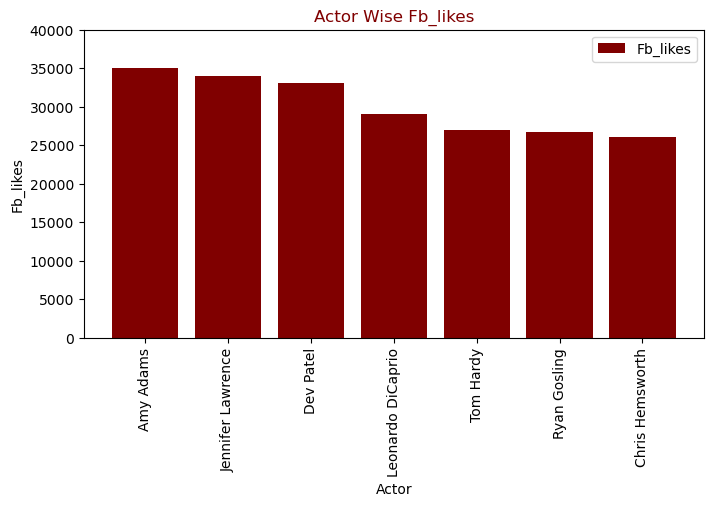

In [71]:
plt.figure(figsize = (8,4))
plt.bar(q3['Actor'],q3['Fb_likes'],color = 'maroon', label = 'Fb_likes')
plt.xlabel('Actor')
plt.ylabel('Fb_likes')
plt.title("Actor Wise Fb_likes", color = 'maroon')
plt.xticks(rotation = 90)
plt.ylim(0,40000)
plt.savefig('ACTOR_WISE_FB_LIKES.png')
plt.legend()
plt.show()

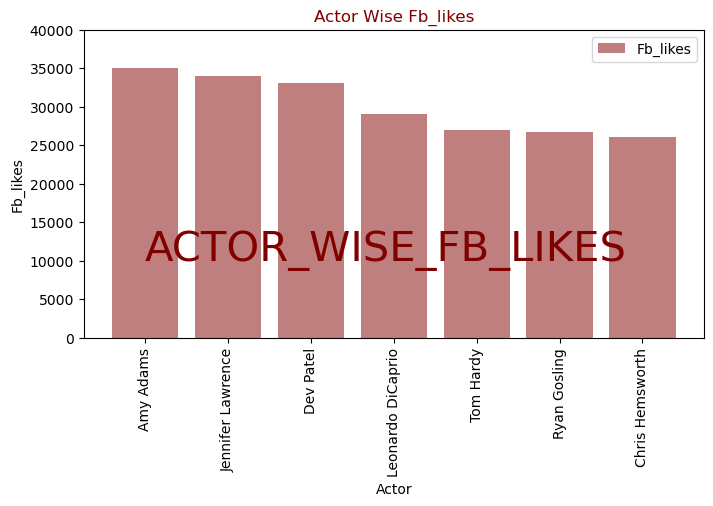

In [94]:
plt.figure(figsize = (8,4))
plt.bar(q3['Actor'],q3['Fb_likes'],color = 'maroon', label = 'Fb_likes',alpha = 0.5)
plt.xlabel('Actor')
plt.ylabel('Fb_likes')
plt.title("Actor Wise Fb_likes", color = 'maroon')
plt.xticks(rotation = 90)
plt.ylim(0,40000)
plt.savefig('ACTOR_WISE_FB_LIKES.png')
plt.legend()
plt.text(0,10000, 'ACTOR_WISE_FB_LIKES', color = 'maroon',fontsize = 30)
plt.show()